# Stay Alert! The Ford Challenge using Classification

The following topics are covered in this colab :

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting, hyperparameter tuning & regularization
- Making predictions on single inputs


# Problem Statement



> Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls, sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.

> The objective of this challenge is to design a detector/classifier that will detect whether the driver is alert or not alert, employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.

## Step 1 - Download and Explore the Data

The dataset is available as a ZIP file at the following url:

In [1]:
import os
data_dir='../input/stayalert'
os.listdir(data_dir)

['fordTest.csv', 'fordTrain.csv', 'example_submission.csv', 'Solution.csv']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
path= data_dir +"/fordTrain.csv"

## Loading the data

In [4]:
ford=pd.read_csv(path)

In [5]:
ford

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


The dataset contains 604329 rows and 33 columns. Each row of the dataset contains information about one customer. 

The objective of this challenge is to design a detector/classifier that will detect whether the driver is alert or not alert, employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.

Let's check the data type for each column.

In [6]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [7]:
n_rows = ford.shape[0]

In [8]:
n_cols = ford.shape[1]

In [9]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 604329 rows and 33 columns.


### Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.


* libraries that we are going to use in this collab 

In [10]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

there is `no null` value in the dataset that reduce our preprocessing time

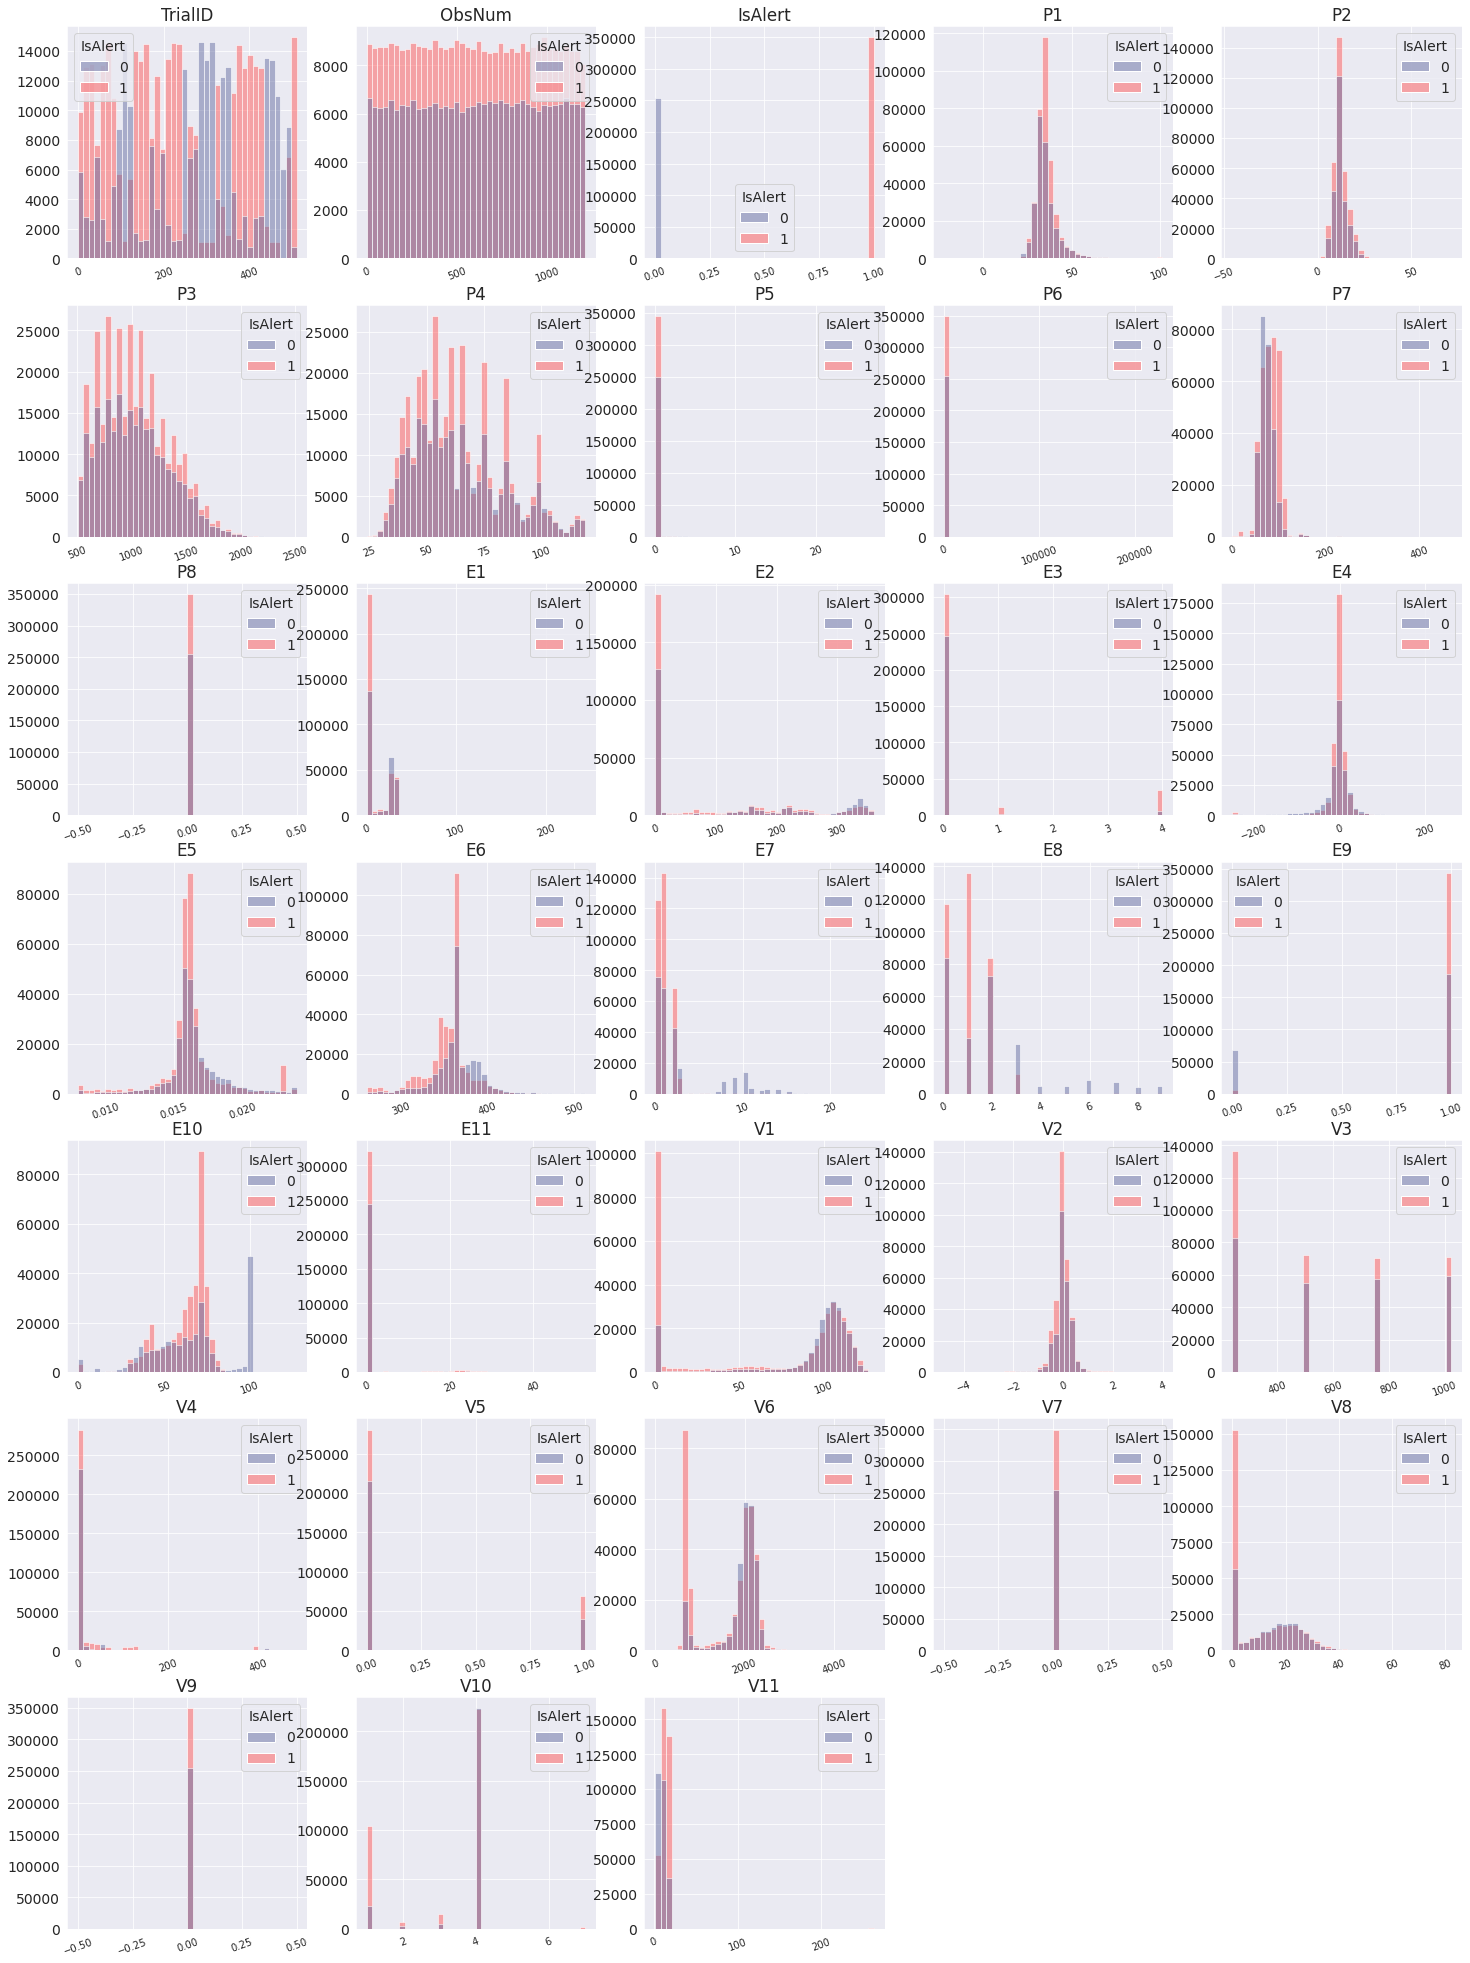

In [12]:
# 0 represent the driver is not aler
# 1 represent the driver is alert
numerical = [feature for feature in ford.columns if ford[feature].dtype in ['int64', 'float64']]
df = ford[numerical]

fig = plt.figure(figsize = (25, 35))

i=1
for n in df.columns:
    plt.subplot(7, 5, i)
    ax = sns.histplot(x = ford[n],hue = ford['IsAlert'], palette = ['#676FA3', '#FF5959'], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

 the above graph represents that the data is `skewed`.

## Step 2 - Prepare the Dataset for Training


Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


### Identify Inputs and Targets

While the dataset contains `33` columns, not all of them are useful for modeling. Note the following:

- The first column and second column- `Trial ID`and `ObsNum` is a unique ID and observation number and isn't useful for training the model.
- The third column `IsAlert` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first,second and the third column) can be used as inputs to the model.
 

> Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [13]:
# Identify the input columns (a list of column names)
input_cols = list(ford.columns)[3:]

In [14]:
print(input_cols)

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']


In [15]:
# Identify the name of the target column (a single string, not a list)
target_col =list(ford.columns)[2]

In [16]:
print(target_col)

IsAlert


Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [17]:
inputs_df = ford[input_cols]
targets = ford[target_col]

In [18]:
inputs_df

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [19]:
targets

0         0
1         0
2         0
3         0
4         0
         ..
604324    1
604325    1
604326    1
604327    1
604328    1
Name: IsAlert, Length: 604329, dtype: int64

### Identify Numeric and Categorical Data
The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

>Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas). 

In [20]:
#numerical=medical.select_dtypes(include=np.number).columns.tolist()
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include=[object]).columns.tolist()

In [21]:
numeric_cols

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11']

In [22]:
categorical_cols

[]

###Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [23]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
min,-22.4812,-45.6292,504.0,23.8853,0.03892,128.0,0.262224,0.0,0.000,0.000,0.0,-250.0,0.008000,260.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.795,240.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,1.67673
max,101.3510,71.1737,2512.0,119.0480,27.20220,228812.0,468.750000,0.0,243.991,359.995,4.0,260.0,0.023939,513.0,25.0,9.0,1.0,127.0,52.4,129.7,3.990,1023.0,484.488,1.0,4892.0,0.0,82.1,0.0,7.0,262.53400


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


 Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])

# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


After scaling, the ranges of all numeric columns should be (0, 1).

In [25]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0


### Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [26]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)


In [27]:
train_inputs

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
504122,0.480232,0.489311,0.201195,0.443388,0.003582,0.002606,0.176335,0.0,0.105451,0.193589,0.0,0.505882,0.691700,0.162055,0.00,0.000000,1.0,0.543307,0.000000,0.824827,0.545817,0.000000,0.006231,0.0,0.427433,0.0,0.433618,0.0,0.500000,0.058125
507742,0.446919,0.473354,0.292829,0.326386,0.002388,0.002659,0.173451,0.0,0.108738,0.289385,0.0,0.533333,0.632411,0.213439,0.04,0.333333,0.0,0.787402,0.000000,0.785582,0.537849,1.000000,0.006231,0.0,0.403720,0.0,0.000000,0.0,0.500000,0.055619
224912,0.392706,0.513197,0.545817,0.143068,0.008836,0.004180,0.117588,0.0,0.000000,0.000000,0.0,0.000000,0.328063,0.011858,0.08,0.000000,0.0,0.976378,0.000000,0.000000,0.482072,0.653895,0.037114,0.0,0.143091,0.0,0.000000,0.0,0.000000,0.045833
561816,0.628045,0.564273,0.117530,0.601032,0.003057,0.003113,0.151907,0.0,0.059596,0.419811,0.0,0.498039,0.106719,0.328063,0.00,0.000000,1.0,0.393701,0.366412,0.015806,0.537849,0.980843,0.030974,0.0,0.164146,0.0,0.000000,0.0,0.000000,0.041056
470792,0.481435,0.530888,0.147410,0.537130,0.008692,0.002046,0.214325,0.0,0.000000,0.000000,0.0,0.603922,0.490119,0.339921,0.04,0.333333,1.0,0.606299,0.000000,0.782729,0.513944,0.673052,0.003070,0.0,0.409444,0.0,0.232643,0.0,0.500000,0.053410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.438132,0.519740,0.105578,0.629591,0.002579,0.003341,0.143018,0.0,0.025575,0.534007,0.0,0.431373,0.509881,0.608696,0.32,0.333333,0.0,0.787402,0.000000,0.365382,0.565737,0.653895,0.012371,0.0,0.177228,0.0,0.000000,0.0,0.500000,0.021407
259178,0.448405,0.470714,0.254980,0.369575,0.008597,0.003498,0.137449,0.0,0.137997,0.905185,0.0,0.466667,0.501976,0.367589,0.08,0.111111,1.0,0.535433,0.000000,0.893832,0.577689,0.980843,0.012371,0.0,0.460957,0.0,0.000000,0.0,0.500000,0.052122
365838,0.396639,0.484526,0.205179,0.437324,0.001958,0.004093,0.119808,0.0,0.120476,0.016009,0.0,0.454902,0.517787,0.418972,0.08,0.000000,1.0,0.338583,0.000000,0.749576,0.553785,0.000000,0.000000,0.0,0.389002,0.0,0.269184,0.0,0.500000,0.022225
131932,0.511248,0.477379,0.211155,0.428423,0.002006,0.002851,0.163635,0.0,0.120066,0.576941,0.0,0.482353,0.486166,0.359684,0.04,0.111111,1.0,0.574803,0.000000,0.779106,0.545817,0.653895,0.012371,0.0,0.403720,0.0,0.232643,0.0,0.500000,0.026665


In [28]:
train_targets

504122    1
507742    0
224912    1
561816    0
470792    1
         ..
110268    0
259178    1
365838    0
131932    0
121958    1
Name: IsAlert, Length: 453246, dtype: int64

In [29]:
val_inputs

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
551187,0.438778,0.456423,0.300797,0.318048,0.002054,0.003218,0.147671,0.0,0.132419,0.479396,0.0,0.505882,0.517787,0.521739,0.12,0.222222,1.0,0.519685,0.0,0.834541,0.537849,0.019157,0.003070,0.0,0.439902,0.0,0.271620,0.0,0.500000,0.035890
155822,0.609066,0.495684,0.197211,0.449561,0.001719,0.003743,0.129594,0.0,0.000357,0.054698,0.0,0.490196,0.644269,0.418972,0.00,0.222222,1.0,0.401575,0.0,0.000000,0.513944,0.000000,0.021672,0.0,0.135119,0.0,0.000000,0.0,0.000000,0.030687
186872,0.435046,0.437501,0.213147,0.425507,0.001003,0.003498,0.137449,0.0,0.117021,0.616256,0.0,0.443137,0.482213,0.383399,0.04,0.111111,1.0,0.543307,0.0,0.767772,0.513944,0.673052,0.006231,0.0,0.406787,0.0,0.052375,0.0,0.500000,0.032760
66220,0.448261,0.580381,0.284861,0.334972,0.001385,0.002624,0.175363,0.0,0.131656,0.471562,0.0,0.498039,0.509881,0.304348,0.04,0.111111,1.0,0.496063,0.0,0.857363,0.553785,0.326948,0.006231,0.0,0.442764,0.0,0.097442,0.0,0.500000,0.029233
541241,0.443919,0.484716,0.392430,0.237008,0.002101,0.002991,0.157164,0.0,0.000000,0.000000,0.0,0.490196,0.462451,0.596838,0.00,0.000000,1.0,0.535433,0.0,0.832691,0.525896,1.000000,0.000000,0.0,0.431930,0.0,0.235079,0.0,0.500000,0.035173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312742,0.497851,0.465575,0.406375,0.226656,0.002340,0.002256,0.198309,0.0,0.000000,0.000000,0.0,0.474510,0.486166,0.600791,0.08,0.222222,1.0,0.472441,0.0,0.000000,0.537849,0.000000,0.024743,0.0,0.131235,0.0,0.000000,0.0,0.000000,0.035118
308358,0.421163,0.509069,0.438247,0.204569,0.002818,0.002449,0.185591,0.0,0.130542,0.900568,0.0,0.447059,0.450593,0.486166,0.36,0.888889,0.0,0.787402,0.0,0.907325,0.545817,0.653895,0.012371,0.0,0.468520,0.0,0.354446,0.0,0.500000,0.030086
313995,0.411353,0.499645,0.017928,0.916595,0.001719,0.002991,0.157164,0.0,0.000012,0.549947,0.0,0.474510,0.889328,0.296443,0.08,0.333333,1.0,0.496063,0.0,0.000000,0.537849,0.000000,0.024743,0.0,0.130213,0.0,0.000000,0.0,0.000000,0.034919
369701,0.594728,0.478928,0.213147,0.425507,0.002531,0.004320,0.114200,0.0,0.090729,0.992200,0.0,0.650980,0.581028,0.422925,0.08,0.000000,1.0,0.314961,0.0,0.584580,0.621514,0.980843,0.012371,0.0,0.528823,0.0,0.595615,0.0,0.500000,0.023408


In [30]:
val_targets

551187    0
155822    1
186872    1
66220     1
541241    0
         ..
312742    0
308358    0
313995    0
369701    0
483217    0
Name: IsAlert, Length: 151083, dtype: int64

# Model 1 - Training a Logistic Regression Model

 Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

 Create and train a Logistic regression  from `sklearn.linear_model`.

In [31]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(solver='liblinear')

# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

## Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

Generate predictions and compute the RMSE loss for the training and validation sets. 
> 
> *Hint*: Use the `mean_squared_error` with the argument `squared=False` to compute RMSE loss.

In [32]:
train_preds =model.predict(train_inputs)

In [33]:
train_preds

array([1, 0, 1, ..., 0, 1, 1])

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
# Root mean square error
train_rmse=mean_squared_error(train_targets,train_preds,squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))
# r2_score
train_r2=r2_score(train_targets,train_preds)*100
print('The r2_score for the training set is {} %'.format(train_r2))

The RMSE loss for the training set is 0.4568503766309443.
The r2_score for the training set is 14.39221366869814 %


In [35]:
val_preds = model.predict(val_inputs)

In [36]:
val_preds

array([0, 1, 1, ..., 1, 0, 1])

In [37]:
val_rmse =mean_squared_error(val_targets,val_preds,squared=False)
print('The RMSE loss for the validation set is {}.'.format(val_rmse))
train_r2=r2_score(val_targets,val_preds)
print('The r2_score for the validation set is {} %.'.format(train_r2))

The RMSE loss for the validation set is 0.4570468260423317.
The r2_score for the validation set is 0.14304719867318205 %.


# Model 2 -Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

## Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

## Evaluation

Let's evaluate the decision tree using the accuracy score.

In [39]:
train_preds = model.predict(train_inputs)

In [40]:
train_preds

array([1, 0, 1, ..., 0, 0, 1])

The decision tree also returns probabilities for each prediction.

In [41]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(train_targets, train_preds)

1.0

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too. 

We can make predictions and compute accuracy in one step using `model.score`

In [43]:
model.score(val_inputs, val_targets)

0.9871527570937829

Although the training accuracy is 100%, the accuracy on the validation set is  about 98%, which is the best result.
 

## Visualization

We can visualize the decision tree _learned_ from the training data.

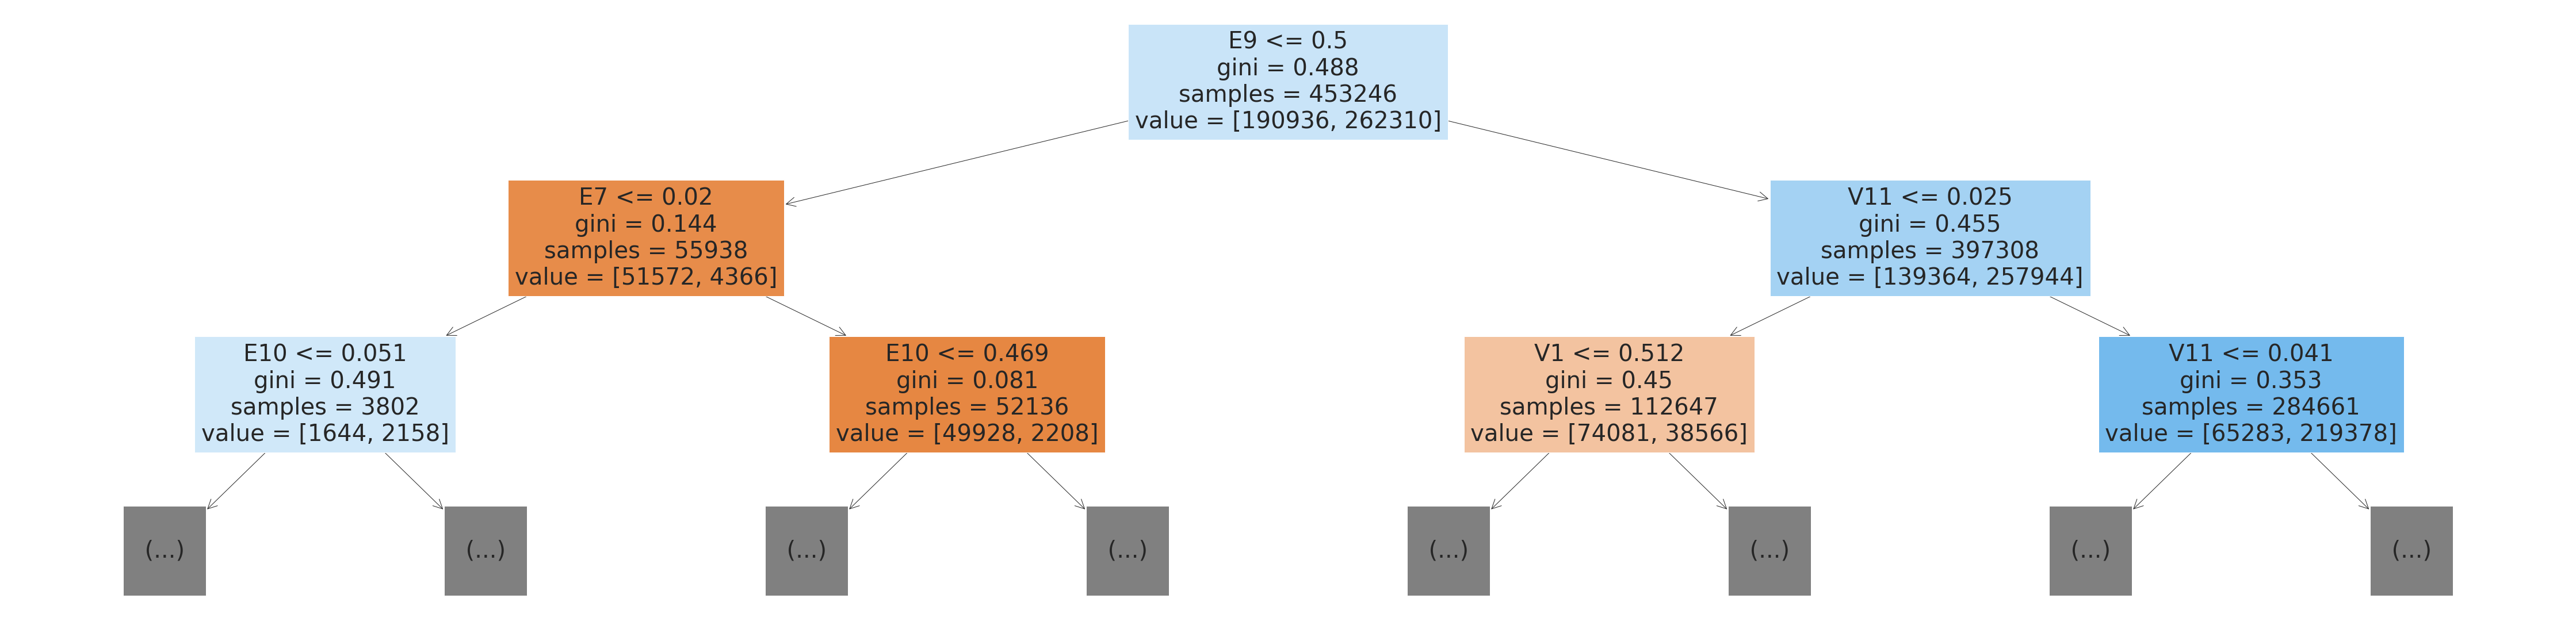

In [44]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_inputs.columns, max_depth=2, filled=True);

Can you see how the model classifies a given input as a series of decisions? The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No". Do you see how a decision tree differs from a logistic regression model?


**How a Decision Tree is Created**

Note the `gini` value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0. 

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Let's check the depth of the tree that was created.

In [45]:
model.tree_.max_depth

43

We can also display the tree as text, which can be easier to follow for deeper trees.

In [46]:
tree_text = export_text(model, max_depth=10, feature_names=list(train_inputs.columns))
print(tree_text[:5000])

|--- E9 <= 0.50
|   |--- E7 <= 0.02
|   |   |--- E10 <= 0.05
|   |   |   |--- V2 <= 0.50
|   |   |   |   |--- E5 <= 0.52
|   |   |   |   |   |--- P1 <= 0.43
|   |   |   |   |   |   |--- P4 <= 0.25
|   |   |   |   |   |   |   |--- V11 <= 0.05
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- V11 >  0.05
|   |   |   |   |   |   |   |   |--- V6 <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- V6 >  0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- P4 >  0.25
|   |   |   |   |   |   |   |--- V6 <= 0.13
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- V6 >  0.13
|   |   |   |   |   |   |   |   |--- E5 <= 0.47
|   |   |   |   |   |   |   |   |   |--- E4 <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- E4 >  0.10
|   |   |   |   |   |   |   |   |   |   |--- P1 <= 0.40
|   |   |   |   |   |   |   |   |  

## Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [47]:
model.feature_importances_

array([0.03708964, 0.0016285 , 0.00550167, 0.005179  , 0.05294908,
       0.04949705, 0.03401812, 0.        , 0.0117966 , 0.0261705 ,
       0.00039131, 0.01516902, 0.02959932, 0.03759833, 0.02346042,
       0.03905362, 0.14476896, 0.05838598, 0.00233194, 0.0937022 ,
       0.01003476, 0.00208227, 0.01477708, 0.00511667, 0.02855192,
       0.        , 0.01098812, 0.        , 0.00140868, 0.25874926])

Let's turn this into a dataframe and visualize the most important features.

In [48]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [49]:
importance_df.head(10)

,feature,importance
29,V11,0.258749
16,E9,0.144769
19,V1,0.093702
17,E10,0.058386
4,P5,0.052949
5,P6,0.049497
15,E8,0.039054
13,E6,0.037598
0,P1,0.037090
6,P7,0.034018


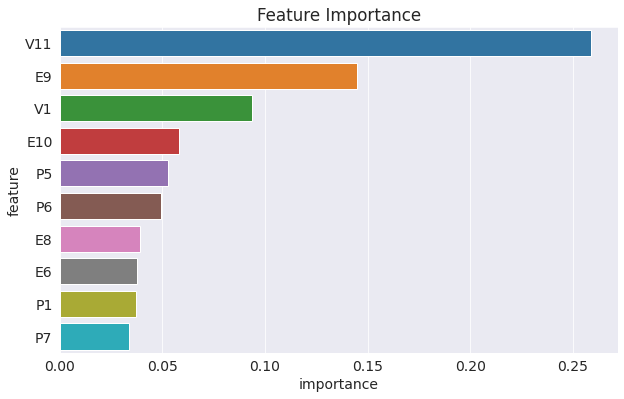

In [50]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Model 3-Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":



In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=42)

model.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [52]:
model.score(train_inputs, train_targets)

1.0

In [53]:
model.score(val_inputs, val_targets)

0.9937385410668308

Once again, the training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. Do you see the power of random forests?

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

<img src="https://i.imgur.com/qJo8D8b.png" width="640">


We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [54]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.  , 1.  ]])

## Feature Importance

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [55]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

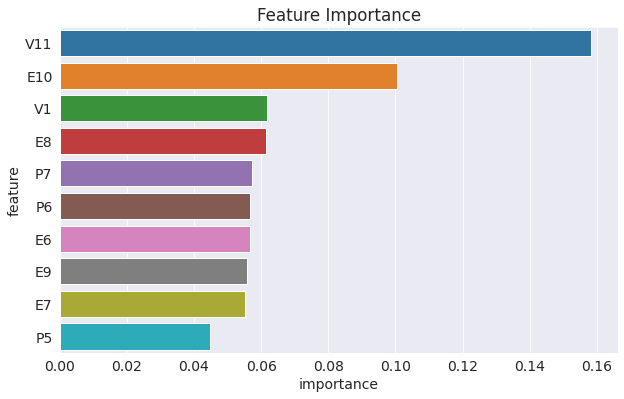

In [56]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');


Notice that the distribution is a lot less skewed than that for a single decision tree.

Finally, let's also compute the accuracy of our model on the test set.

## Making Predictions on the Test Set

Let's make predictions on the test set provided with the data.

In [57]:
test_df = pd.read_csv('../input/stayalert/fordTest.csv')

In [58]:
test_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


First, we need to reapply all the preprocessing steps.

In [59]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [60]:
test_preds = model.predict(test_df[numeric_cols])

In [61]:
submission_df = pd.read_csv('../input/stayalert/example_submission.csv')

In [62]:
submission_df

,TrialID,ObsNum,Prediction
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
120835,99,1206,0
120836,99,1207,0
120837,99,1208,0
120838,99,1209,0


Let's replace the values of the `Predictipn` column with our predictions.

In [63]:
submission_df['Prediction'] = test_preds

Let's save it as a CSV file and download it.

In [64]:
submission_df.to_csv('submission.csv', index=False)

In [65]:
solution = pd.read_csv('../input/stayalert/Solution.csv')

In [66]:
solution

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private
